## Testing FFT cross-correlation
And fitting the threshold value using the ONT dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from dsp import clean_signal, cross_correlation_fft
from utils import write_fasta_for_squigulator, get_data_from_fast5
import matplotlib.pyplot as plt
import numpy as np

In [25]:
import torch
from functorch import vmap

def cross_correlation_fft(x, y):
    n = x.shape[0] + y.shape[0] - 1
    n_padded = 1 << (n - 1).bit_length()
    # Ensure contiguous tensors
    x = x.contiguous()
    y = y.contiguous()
    
    X = torch.fft.fft(x, n_padded)
    Y = torch.fft.fft(y, n_padded)
    
    corr = torch.fft.ifft(X * torch.conj(Y))
    return corr.real

In [4]:
ont_df = pd.read_pickle(
    r'C:\Users\Parv\Doc\RA\Projects\DSP\data\datasets\clean_f5_fq_data_ont.pkl')

In [5]:
squiggle_arr = ont_df['squiggle'].tolist()
strand_arr = ont_df['strand'].tolist()
set_squiggle = squiggle_arr[0]
set_strand = strand_arr[0]

In [7]:
subseqs = [set_strand[i: i + 30] for i in range(0, len(set_strand) - 30)]

In [33]:
t = [clean_signal(squiggle_arr[4]) for i in range(len(motif_data))]

In [45]:
motif_data = [clean_signal(i) for i in motif_data]

In [35]:
s = torch.tensor(np.array(t))

In [ ]:
l.shape

torch.Size([2003, 405])

In [36]:
batch_corr = vmap(cross_correlation_fft)

c:\Users\Parv\anaconda3\envs\pytorch_gpu\Lib\site-packages\torch\_functorch\deprecated.py:61: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.vmap is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.vmap instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('vmap', 'torch.vmap')


In [ ]:
s = torch.tensor(np.array(t))
l = torch.tensor(np.array(motif_data))
m = batch_corr(s, l)

In [41]:
max_vals = [torch.argmax(i) for i in m]

In [ ]:
motif

2003

In [62]:

from tqdm import tqdm

corrs_full = []
def corrs_full_array(motif_data):
    motif_data = torch.tensor(np.array(motif_data))
    

    for i in tqdm(squiggle_arr):
        if len(i) > 10000:
            continue

        print("I enter here")
        signal = clean_signal(i)
        t = [signal for i in range(len(motif_data))]

        s = torch.tensor(np.array(t))
        corr = batch_corr(s, motif_data)
        corrs_full.append(corr)

    return corrs_full

corrs_full_array(motif_data)
    

  0%|          | 0/20000 [00:00<?, ?it/s]

I enter here


  0%|          | 8/20000 [00:01<49:11,  6.77it/s]

I enter here


  0%|          | 21/20000 [00:01<20:59, 15.86it/s]

I enter here


  0%|          | 24/20000 [00:01<25:40, 12.97it/s]

I enter here


  0%|          | 26/20000 [00:02<39:18,  8.47it/s]

I enter here


  0%|          | 30/20000 [00:03<38:08,  8.72it/s]

I enter here


  0%|          | 44/20000 [00:03<25:38, 12.97it/s]

I enter here


  0%|          | 47/20000 [00:04<26:20, 12.63it/s]

I enter here


  0%|          | 70/20000 [00:04<21:14, 15.64it/s]


KeyboardInterrupt: 

In [75]:
len(motif_data)

2003

In [77]:
for i in corrs_full:
    t = [torch.argmax(k) for k in i]
    print(t)

[tensor(7093), tensor(7173), tensor(8740), tensor(6344), tensor(6353), tensor(6362), tensor(6372), tensor(1272), tensor(1281), tensor(1290), tensor(6406), tensor(6415), tensor(1317), tensor(8749), tensor(1326), tensor(1336), tensor(1345), tensor(1354), tensor(1363), tensor(1372), tensor(1381), tensor(1390), tensor(1399), tensor(1408), tensor(2146), tensor(1417), tensor(1426), tensor(7068), tensor(2076), tensor(1453), tensor(7178), tensor(1543), tensor(1553), tensor(1562), tensor(6359), tensor(8767), tensor(6599), tensor(6608), tensor(6563), tensor(6572), tensor(6581), tensor(6412), tensor(7227), tensor(7236), tensor(7245), tensor(6448), tensor(7050), tensor(6689), tensor(6466), tensor(6474), tensor(6484), tensor(6493), tensor(6502), tensor(6511), tensor(7535), tensor(7545), tensor(7554), tensor(8785), tensor(7563), tensor(7572), tensor(7582), tensor(7591), tensor(7600), tensor(7608), tensor(7618), tensor(8060), tensor(1432), tensor(1442), tensor(8795), tensor(1451), tensor(1460), tenso

KeyboardInterrupt: 

AttributeError: 'list' object has no attribute 'shape'

In [73]:
corrs_full[0].shape

torch.Size([2003, 16384])

In [56]:
corrs_full_array

<function __main__.corrs_full_array(motif_data)>

In [42]:
print(max_vals)

[tensor(6161), tensor(8984), tensor(1748), tensor(851), tensor(859), tensor(869), tensor(3497), tensor(886), tensor(896), tensor(906), tensor(915), tensor(7445), tensor(5950), tensor(1757), tensor(9102), tensor(5970), tensor(5979), tensor(5988), tensor(5998), tensor(282), tensor(291), tensor(10042), tensor(10051), tensor(9971), tensor(4907), tensor(9980), tensor(9989), tensor(6070), tensor(6079), tensor(10015), tensor(10025), tensor(10034), tensor(6115), tensor(6125), tensor(10061), tensor(6430), tensor(6143), tensor(6152), tensor(6160), tensor(10097), tensor(6040), tensor(10115), tensor(10124), tensor(10132), tensor(10141), tensor(10150), tensor(1784), tensor(6233), tensor(10168), tensor(6251), tensor(10186), tensor(10195), tensor(10204), tensor(10213), tensor(10222), tensor(10231), tensor(10240), tensor(7473), tensor(10249), tensor(10258), tensor(10267), tensor(295), tensor(10285), tensor(10294), tensor(10303), tensor(10312), tensor(199), tensor(208), tensor(7482), tensor(217), tenso

In [8]:
# Writing fasta file for squigulator
write_fasta_for_squigulator(subseqs)

# Running Squigulator and slo5 conversion
# Loading squigulator data for subsequences
_, motif_data = get_data_from_fast5(r"C:\Users\Parv\Doc\HelixWorks\Basecalling\squigulator\slow5tools-v1.1.0\testing.fast5")

In [81]:
corr = cross_correlation_fft(clean_signal(set_squiggle), clean_signal(set_squiggle[2000:2300]))

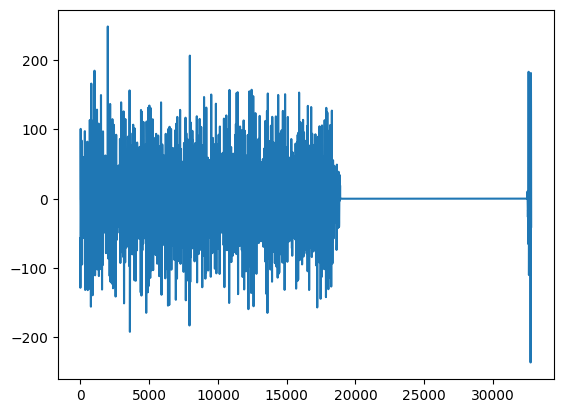

In [82]:
plt.plot(corr)

In [83]:
np.argmax(corr)

np.int64(2000)

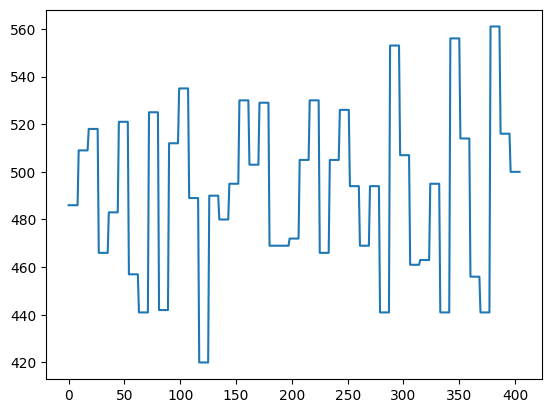

In [67]:
plt.plot(motif_data[20])

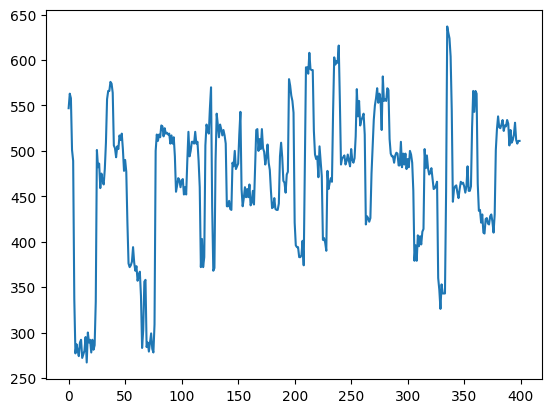

In [69]:
plt.plot(set_squiggle[200:600])

In [60]:
lag_at_max

np.int64(7712)

In [32]:
from sklearn.preprocessing import normalize

In [41]:
normalized = normalize([set_squiggle], norm='max').flatten()

In [42]:
normalized

array([0.62082262, 0.65938303, 0.64395887, ..., 0.70179949, 0.70565553,
       0.89974293])

In [55]:
corr

array([-14.88542116,  -2.422065  ,   8.29073151, ..., -57.09617485,
       -42.82081037, -28.55496919])

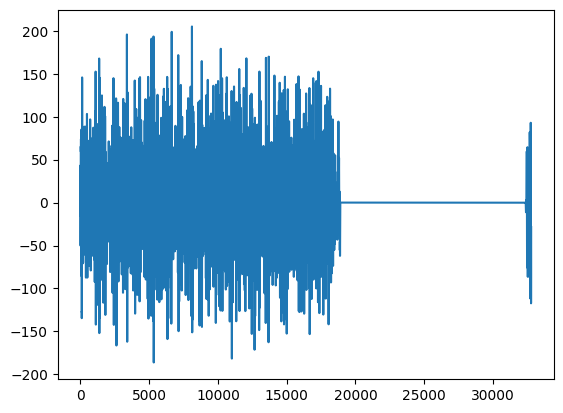

In [54]:
plt.plot(corr)

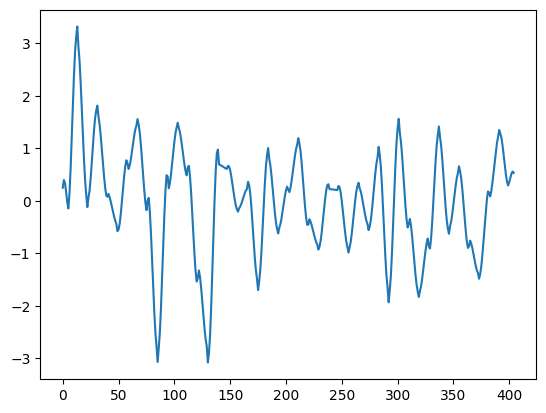

In [52]:
plt.plot(clean_signal(motif_data[0]))

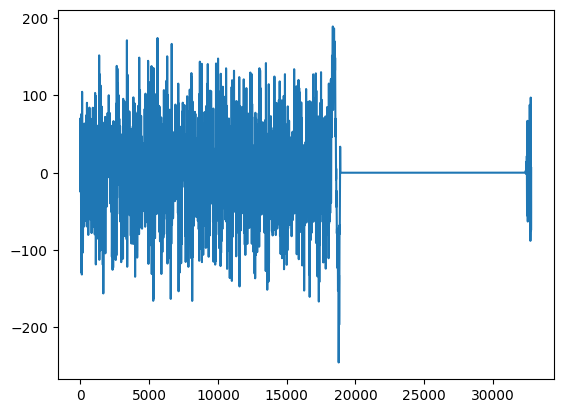

In [19]:
plt.plot(corr)